## Sentimental polarity analisys searching tweets by **blackfraude**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from textblob import TextBlob
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# pd.set_option('display.max_colwidth',362)

In [2]:
data = pd.read_json('./tweets1.json',encoding='utf-8')

In [3]:
data.head()

,fullname,html,id,likes,replies,retweets,text,timestamp,url,user
0,Ricardo André,"<p class=""TweetTextSize js-tweet-text tweet-te...",1063197496304967680,0,1,0,Hahahahah... Todo ano é essa mentira na BlackF...,2018-11-15 22:30:11,/RickRock_1975/status/1063197496304967682,RickRock_1975
1,Bruno Gabriel Silva,"<p class=""TweetTextSize js-tweet-text tweet-te...",1063172546097491968,0,0,0,BlackFraude então... ?,2018-11-15 20:51:02,/Sescok/status/1063172546097491970,Sescok
2,Franklin,"<p class=""TweetTextSize js-tweet-text tweet-te...",1063129511531896832,1,2,0,amanhã é blackfraude,2018-11-15 18:00:02,/franklin_lessa/status/1063129511531896834,franklin_lessa
3,André Soares,"<p class=""TweetTextSize js-tweet-text tweet-te...",1063121139432673280,0,2,0,Alerta de #BlackFraude no Walmart e Sams Club....,2018-11-15 17:26:46,/AndreSoares85/status/1063121139432673281,AndreSoares85
4,Renan Dias,"<p class=""TweetTextSize js-tweet-text tweet-te...",1063110536387313664,12,3,4,ABSURDO!\n@pontofrio @submarino @americanascom...,2018-11-15 16:44:38,/ree_atwood/status/1063110536387313665,ree_atwood


In [4]:
data.shape

(312, 10)

In [5]:
# cleaning data
df = data.drop(columns=['html','url','likes','replies','retweets','id'])

In [6]:
df["comment_length"]= df["text"].str.len() 

In [7]:
df['comment_length'].describe()

count    312.000000
mean     133.150641
std       81.100785
min       11.000000
25%       65.000000
50%      110.000000
75%      200.000000
max      362.000000
Name: comment_length, dtype: float64

In [8]:
bigger_comment = df.loc[df['comment_length'] == 362]
bigger_comment

,fullname,text,timestamp,user,comment_length
24,Ecologistas Zaragoza,¡Pasa del consumismo estúpido! #DiaSinCompras2...,2018-11-18 22:42:54,ecologistaszgz,362


In [9]:
df["cluster"]= df["comment_length"].apply(lambda x: 'LST' if x <= 100 else( 'MDN' if x>100 and x<200 else 'BGR'))

In [10]:
df.head()

,fullname,text,timestamp,user,comment_length,cluster
0,Ricardo André,Hahahahah... Todo ano é essa mentira na BlackF...,2018-11-15 22:30:11,RickRock_1975,116,MDN
1,Bruno Gabriel Silva,BlackFraude então... ?,2018-11-15 20:51:02,Sescok,22,LST
2,Franklin,amanhã é blackfraude,2018-11-15 18:00:02,franklin_lessa,20,LST
3,André Soares,Alerta de #BlackFraude no Walmart e Sams Club....,2018-11-15 17:26:46,AndreSoares85,198,MDN
4,Renan Dias,ABSURDO!\n@pontofrio @submarino @americanascom...,2018-11-15 16:44:38,ree_atwood,274,BGR


# Bar chart of class proportion

In [11]:
LST_len = df[df['cluster'] == 'LST'].shape[0]
MDN_len = df[df['cluster'] == 'MDN'].shape[0]
BGR_len = df[df['cluster'] == 'BGR'].shape[0]

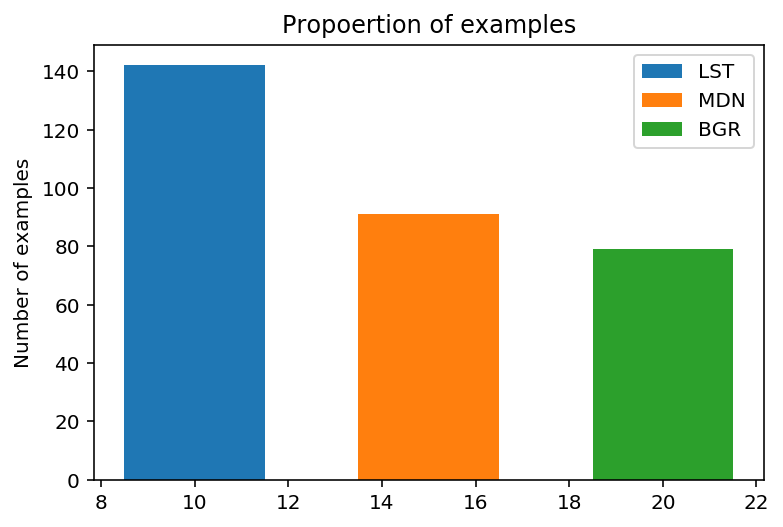

In [12]:
# bar plot of the 3 classes
plt.bar(10,LST_len,3, label="LST")
plt.bar(15,MDN_len,3, label="MDN")
plt.bar(20,BGR_len,3, label="BGR")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

# Setting sentiment polarity

In [13]:
# df['phrase'] = TextBlob(df['text'])
polarities = []
for text in df['text']:
    phrase = TextBlob(text)
    if phrase.sentiment.polarity > 0:
        polarities.append('POSITIVE')
    elif phrase.sentiment.polarity > 0:
        polarities.append('NEUTRAL')
    else:
        polarities.append('NEGATIVE')

In [14]:
df['polarities'] = polarities

In [15]:
df['polarities'].describe()

count          312
unique           2
top       NEGATIVE
freq           291
Name: polarities, dtype: object